In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/code?datasetId=11827&sortBy=voteCount&searchQuery=NLtk
df=pd.read_csv('C:/Users/Shai/OneDrive/Documents/Data science/Women E-commerce Product review/Womens Clothing E-Commerce Reviews.csv', index_col=0)
print(df.shape)
df.head()

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


<AxesSubplot:xlabel='Rating', ylabel='count'>

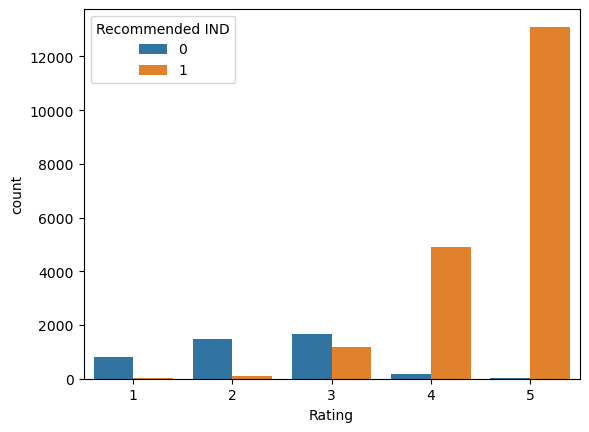

In [9]:
sns.countplot(data=df, x='Rating', hue='Recommended IND')

In [10]:
#Focus on the necessary columns
df_review= df[['Title', 'Review Text', 'Recommended IND', 'Rating']]
df_review.head()

,Title,Review Text,Recommended IND,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,1,4
1,NaN,Love this dress! it's sooo pretty. i happene...,1,5
2,Some major design flaws,I had such high hopes for this dress and reall...,0,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,5
4,Flattering shirt,This shirt is very flattering to all due to th...,1,5


In [11]:
#Merge the Title and Review Text
df_review['Review'] = df_review['Title'] + ' ' + df_review['Review Text']
df_review = df_review.drop(labels=['Title','Review Text'] , axis=1)
df_review = df_review.rename(columns={"Recommended IND": "Is_Recommended"})
df_review.head()

C:\Users\Shai\AppData\Local\Temp\ipykernel_26064\162031079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Review'] = df_review['Title'] + ' ' + df_review['Review Text']


,Is_Recommended,Rating,Review
0,1,4,NaN
1,1,5,NaN
2,0,3,Some major design flaws I had such high hopes ...
3,1,5,"My favorite buy! I love, love, love this jumps..."
4,1,5,Flattering shirt This shirt is very flattering...


In [12]:
df_review.Review.isna().sum()

3811

In [13]:
df_review.dropna(inplace=True)
df_review.shape

(19675, 3)

In [14]:
df_review['Is_Recommended'].value_counts(normalize=True)

1    0.818297
0    0.181703
Name: Is_Recommended, dtype: float64

In [15]:
#There's imbalance with the target variable
#New column for count of text
df_review['Review_Length'] = df_review['Review'].apply(len)
df_review.head()

,Is_Recommended,Rating,Review,Review_Length
2,0,3,Some major design flaws I had such high hopes ...,524
3,1,5,"My favorite buy! I love, love, love this jumps...",141
4,1,5,Flattering shirt This shirt is very flattering...,209
5,0,2,Not for the very petite I love tracy reese dre...,512
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517


C:\Users\Shai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Review_Length', ylabel='Density'>

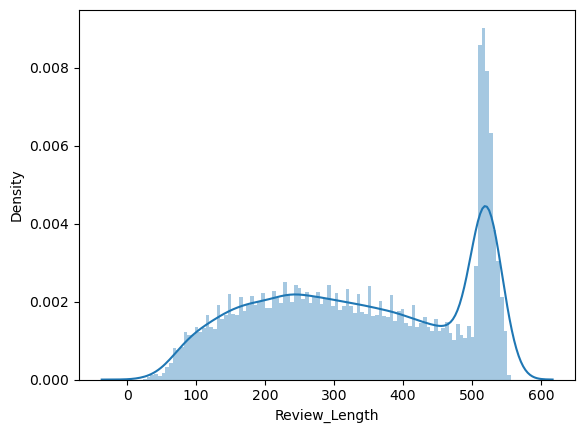

In [16]:
sns.distplot(df_review['Review_Length'], hist=True,bins=100)

C:\Users\Shai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


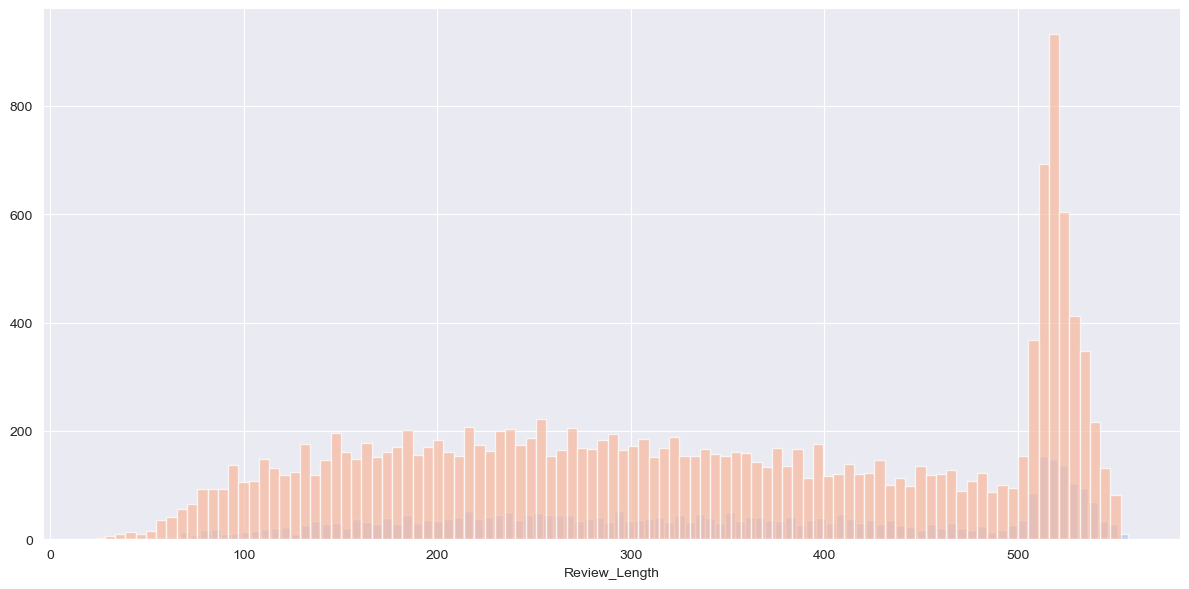

In [17]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_review,hue="Is_Recommended",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Review_Length',bins=100,alpha=0.7)

In [18]:
# Importing essential libraries for performing Natural Language Processing on review
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
X=df_review['Review']

In [20]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [21]:
# Cleaning the reviews
cleaned_review = []
for i in range(len(X)):

    #Cleaning special character from the reviews
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=X.iloc[i])
    #Converting the entire review into lower case then tokenizing by words
    review = review.lower().split()
    #Removing the stop words and then stemming the words
    review = [stemmer.stem(word) for word in review if (word not in stop_words)]
    #Joining the stemmed words
    review = ' '.join(review)
    #Cleaning number character from the reviews
    review = re.sub(pattern='\d+', repl=' ', string=X.iloc[i]) 
    
    #Remove characters which have length less than 2  
    #review = [word for word in review if len(word) > 2]
    
    #Creating a corpus
    cleaned_review.append(review)


In [22]:
df_review['Cleaned_Review'] = pd.DataFrame(cleaned_review)
df_review.head()

,Is_Recommended,Rating,Review,Review_Length,Cleaned_Review
2,0,3,Some major design flaws I had such high hopes ...,524,Flattering shirt This shirt is very flattering...
3,1,5,"My favorite buy! I love, love, love this jumps...",141,Not for the very petite I love tracy reese dre...
4,1,5,Flattering shirt This shirt is very flattering...,209,Cagrcoal shimmer fun I aded this in my basket ...
5,0,2,Not for the very petite I love tracy reese dre...,512,"Shimmer, surprisingly goes with lots I ordered..."
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,Flattering I love this dress. i usually get an...


In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud

In [25]:
def wc(data,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = 'white', max_words = 1000,  max_font_size = 50, colormap='gist_heat')
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

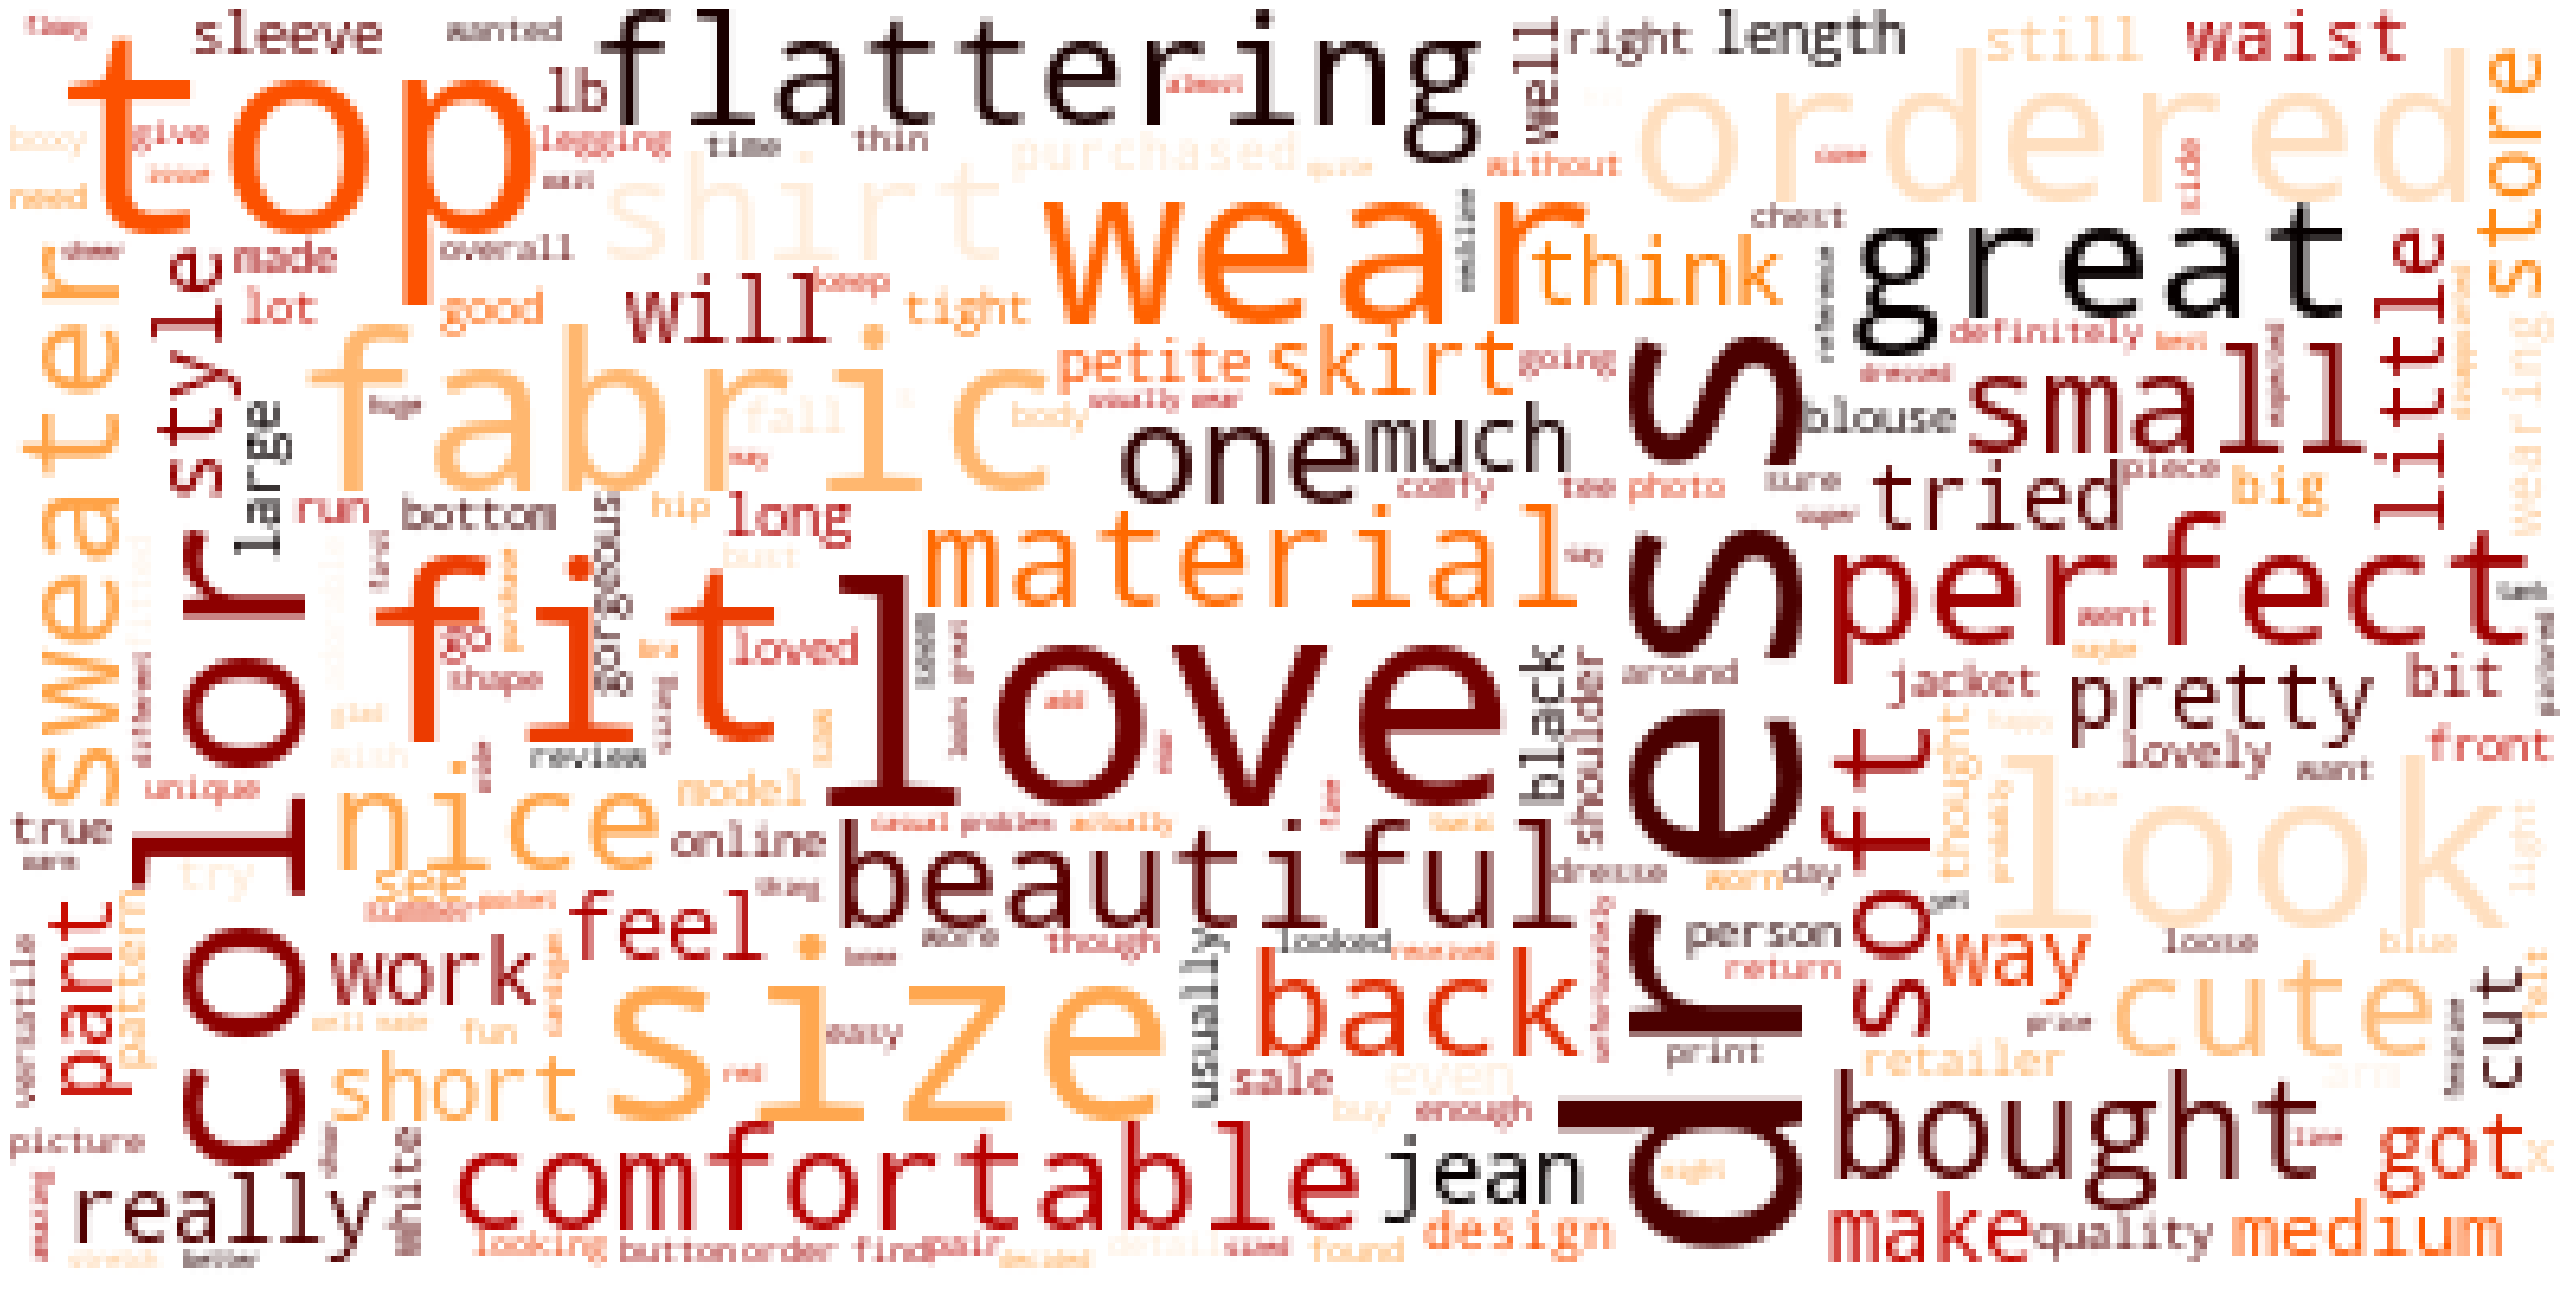

In [26]:
wc(cleaned_review,'Most Used Words')

In [27]:
!pip install textblob

In [28]:
#Polarity
from textblob import TextBlob

In [29]:
df_review['Cleaned_Review'] = df_review['Cleaned_Review'].astype(str)

In [30]:
df_review['Polarity'] = df_review['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_review.head(5)

,Is_Recommended,Rating,Review,Review_Length,Cleaned_Review,Polarity
2,0,3,Some major design flaws I had such high hopes ...,524,Flattering shirt This shirt is very flattering...,0.512891
3,1,5,"My favorite buy! I love, love, love this jumps...",141,Not for the very petite I love tracy reese dre...,0.181111
4,1,5,Flattering shirt This shirt is very flattering...,209,Cagrcoal shimmer fun I aded this in my basket ...,0.157500
5,0,2,Not for the very petite I love tracy reese dre...,512,"Shimmer, surprisingly goes with lots I ordered...",0.230342
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,Flattering I love this dress. i usually get an...,0.002500


In [31]:
df_review['Sentiment_Type'] = np.where(df_review['Polarity'] > 0, "Positive Review", np.where(df_review['Polarity'] < 0, "Negative Review", "Neutral Review"))

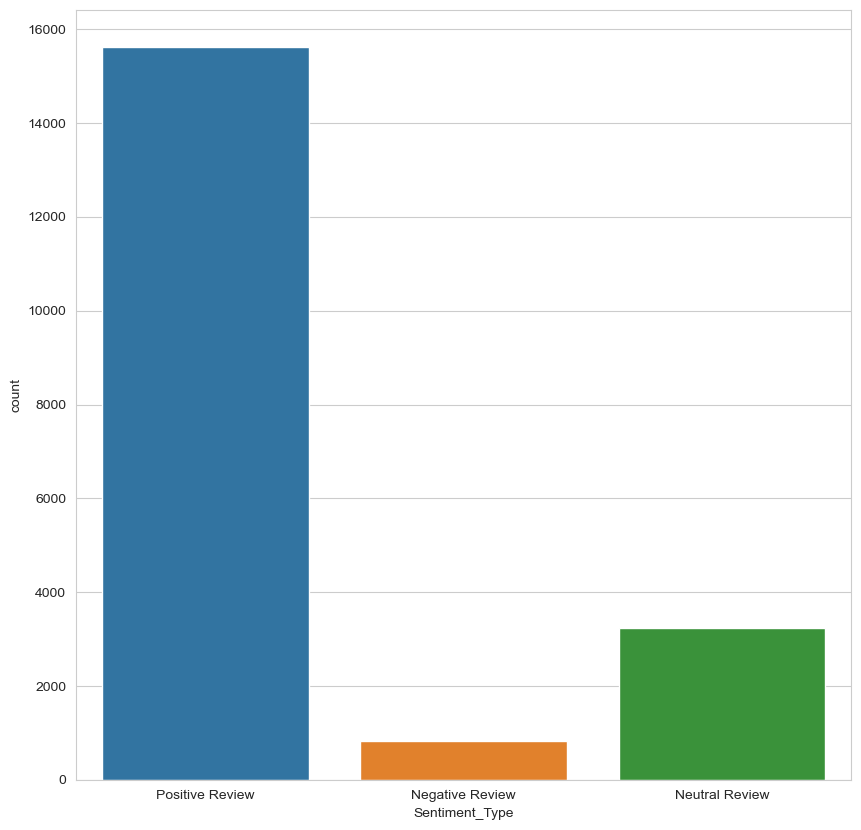

In [32]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_review)

In [33]:
positive_reviews=df_review[df_review['Sentiment_Type']=='Positive Review']
negative_reviews=df_review[df_review['Sentiment_Type']=='Negative Review']

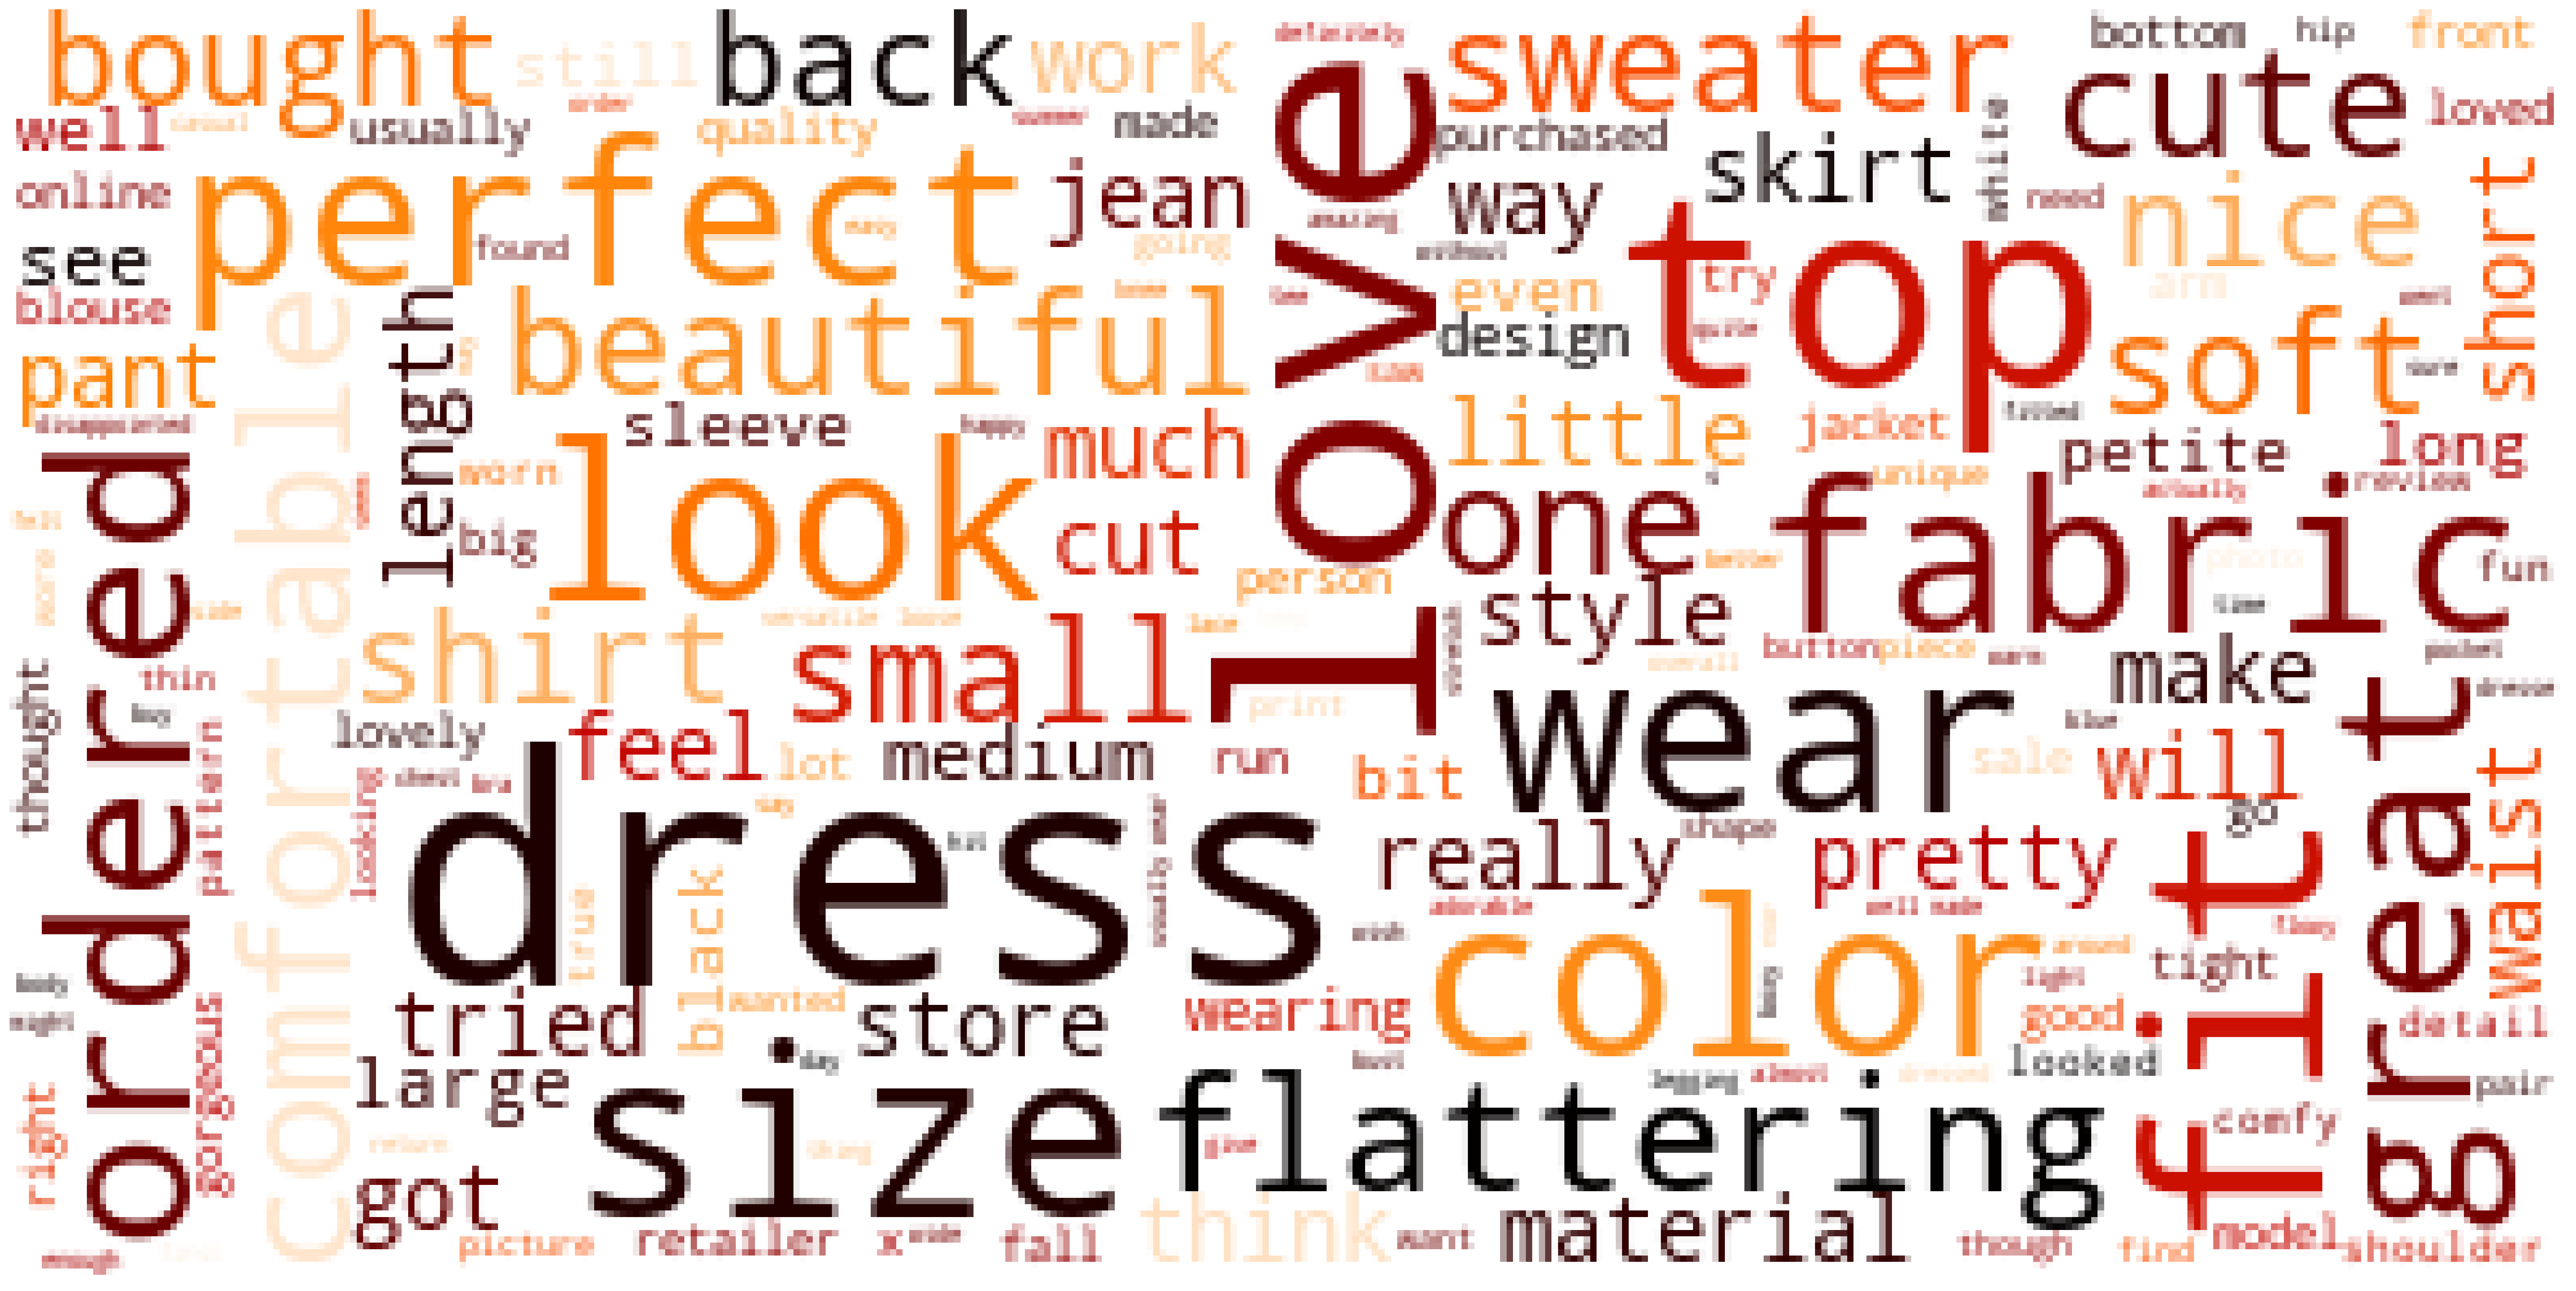

In [34]:
wc(positive_reviews['Review'],'Most Used Words')

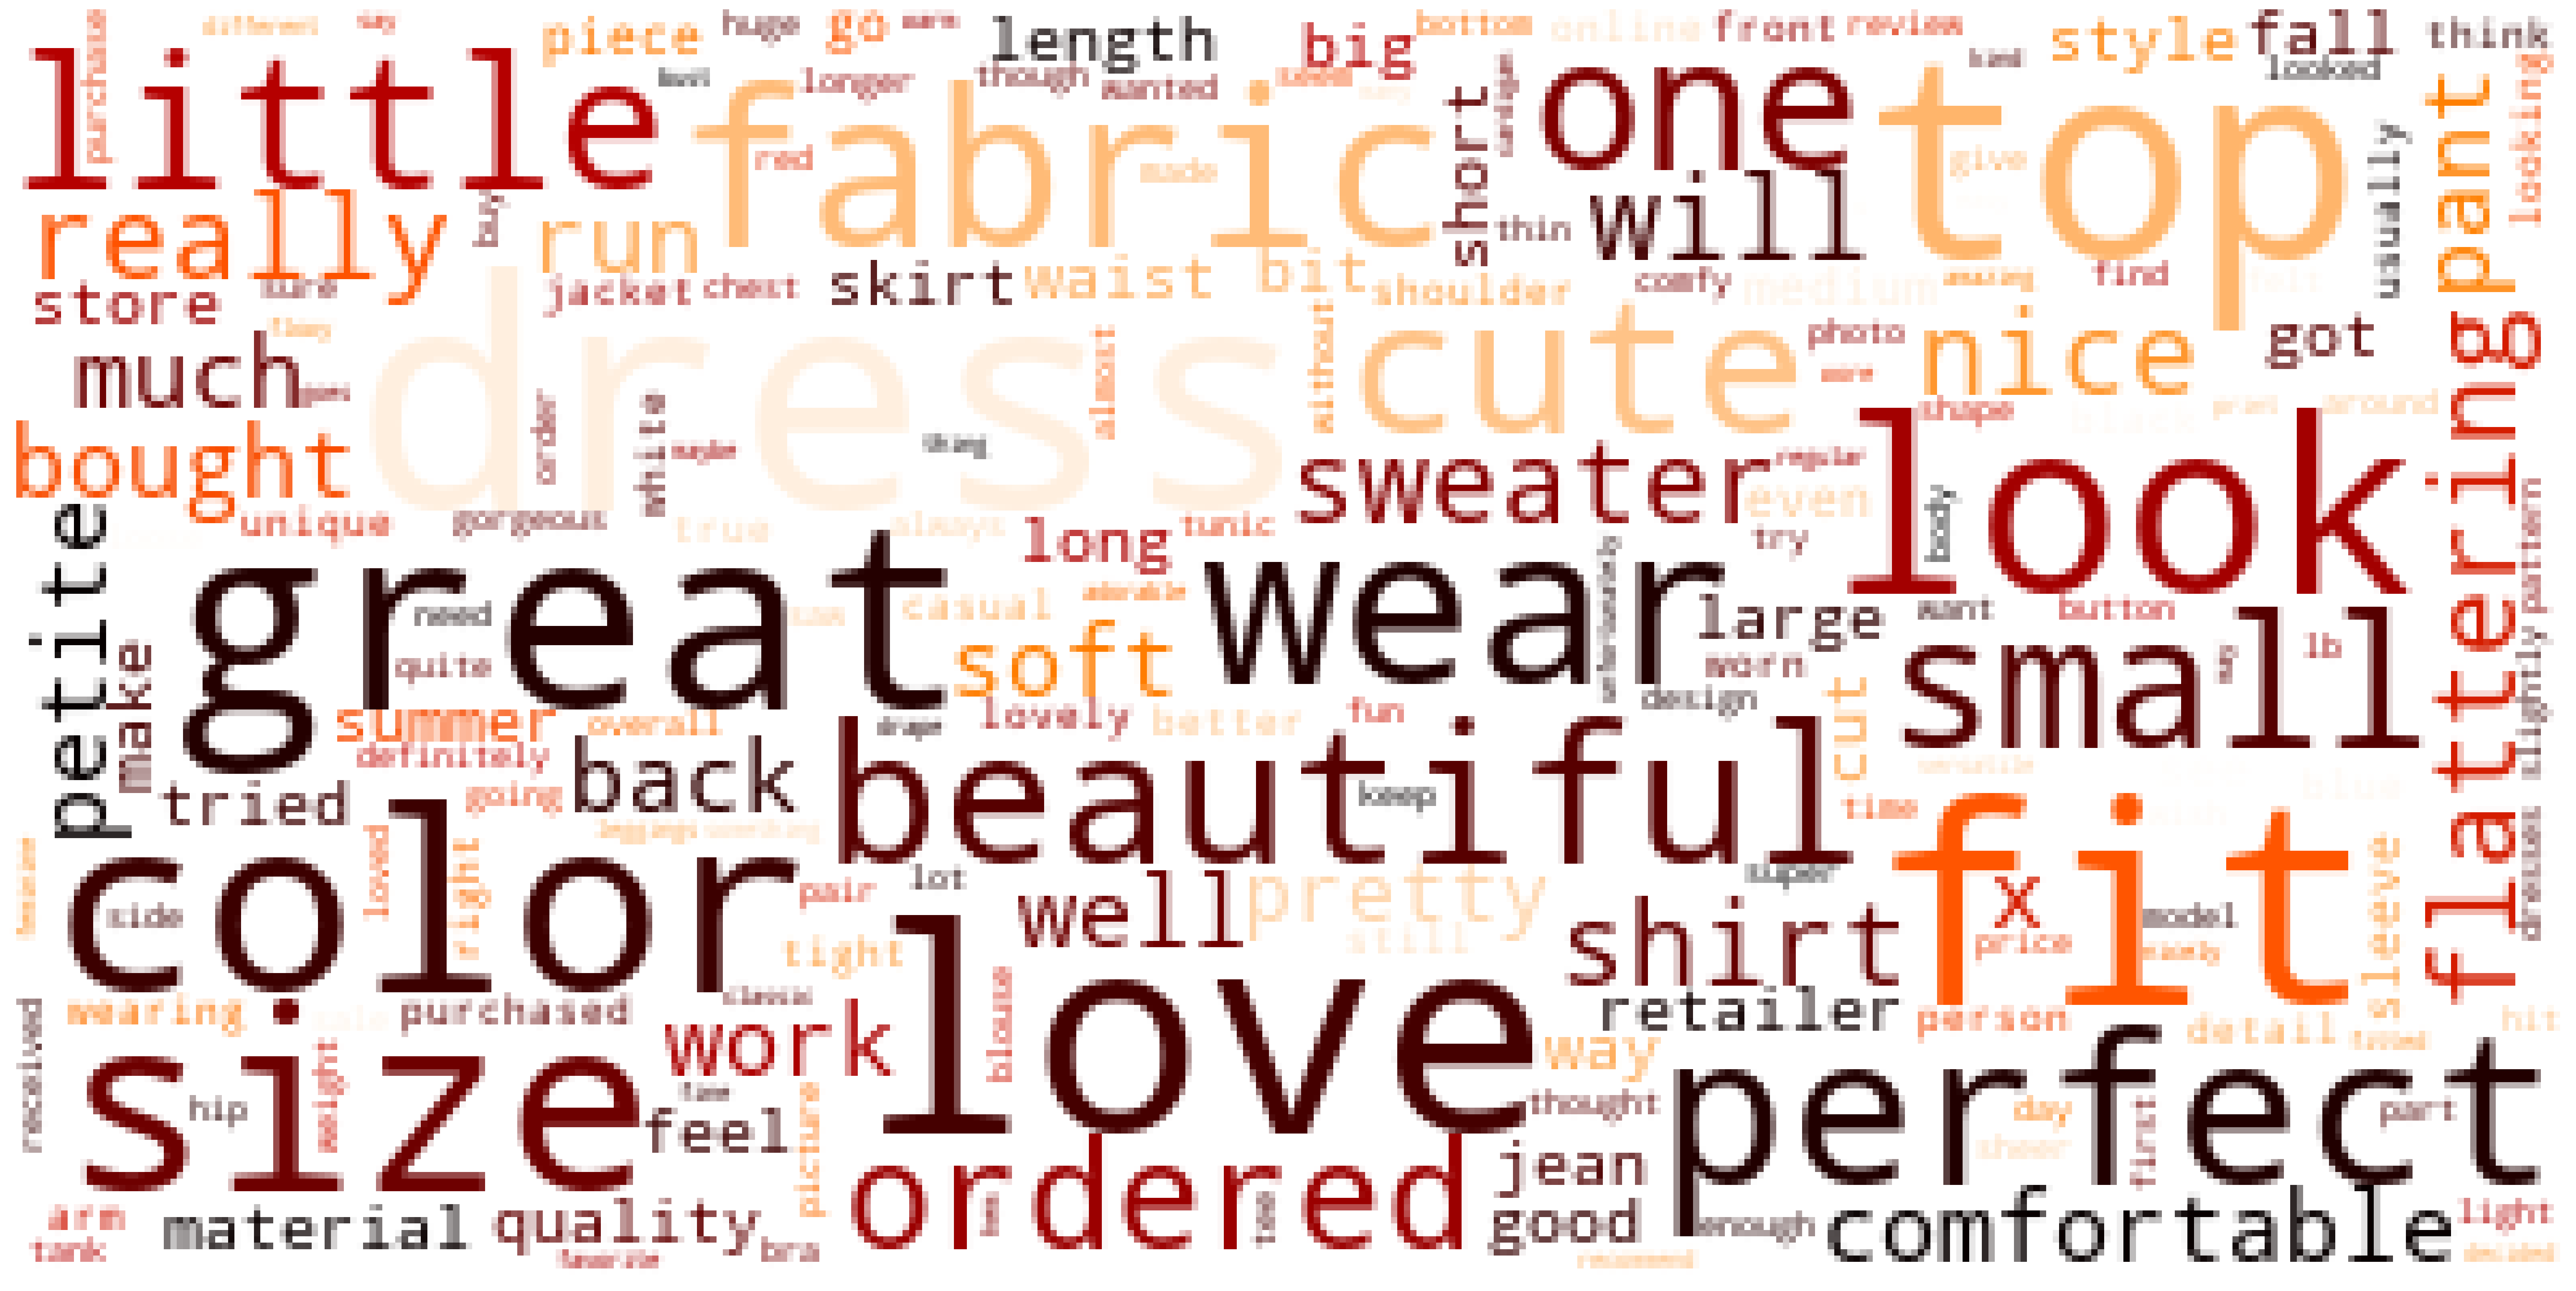

In [35]:
wc(negative_reviews['Review'],'Most Used Words')

Bag of words

In [36]:
X=df_review["Cleaned_Review"]
y=df_review["Rating"]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
X_fin=cv.fit_transform(X).toarray()

In [38]:
sentiment_ordering = ['negative', 'neutral', 'positive']
y = y.apply(lambda x: sentiment_ordering.index(x))

ValueError: 3 is not in list

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

In [ ]:
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [ ]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [ ]:
text_prep['Review'] = text_prep['Review'].apply(stopwords_removal)
text_prep['Review'].head()